In [1]:
# Cell 1: imports and small settings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn imports used across cells
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Classifiers
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

# For association rules (if not installed: pip install mlxtend)
try:
    from mlxtend.frequent_patterns import apriori, association_rules
    MLXTEND_AVAILABLE = True
except Exception:
    MLXTEND_AVAILABLE = False

# Display options
pd.set_option('display.max_columns', 200)


In [2]:
# Cell 2: load data
DATA_PATH = "CarPrice_Assignment.csv"  # change if needed
df = pd.read_csv(DATA_PATH)
df.columns = [c.strip() for c in df.columns]  # strip whitespace from names
print("Rows, cols:", df.shape)
display(df.head())
display(df.describe(include='all').T)


Rows, cols: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_ID,205.0,NaN,NaN,NaN,103.0,59.322565,1.0,52.0,103.0,154.0,205.0
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
CarName,205,147,peugeot 504,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9


In [3]:
# Cell 3: create target price_category (3 equal-frequency bins: low/medium/high)
df = df.copy()
df['price_category'] = pd.qcut(df['price'], q=3, labels=['low','medium','high'])

# Extract company from CarName (useful categorical)
df['company'] = df['CarName'].astype(str).str.split(' ').str[0]

# Select features to use (a reasonable subset containing numeric & categorical)
num_cols = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
            'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
cat_cols = ['carbody','fueltype','aspiration','doornumber','enginelocation','drivewheel','enginetype','fuelsystem']

# compress companies to top N categories + 'other'
top_companies = df['company'].value_counts().nlargest(8).index.tolist()
df['company_mod'] = df['company'].where(df['company'].isin(top_companies), 'other')
cat_cols.append('company_mod')

# select and drop NA rows for simplicity
sel_cols = num_cols + cat_cols + ['price_category','price']
df_small = df[sel_cols].dropna().reset_index(drop=True)

print("Rows after selecting features and dropping NA:", df_small.shape[0])
display(df_small['price_category'].value_counts())


Rows after selecting features and dropping NA: 205


,count
price_category,
medium,69
low,68
high,68


In [4]:
# Cell 4: preprocessing and split
X = df_small[num_cols + cat_cols]
y = df_small['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])


In [5]:
# Cell 5: models and hyperparameter tuning
dt_pipeline = Pipeline(steps=[('pre', preprocessor), ('clf', DecisionTreeClassifier(random_state=42))])
knn_pipeline = Pipeline(steps=[('pre', preprocessor), ('clf', KNeighborsClassifier())])

# Hyperparameter grid for decision tree
param_grid = {
    'clf__max_depth': [3,5,7,9, None],
    'clf__min_samples_split': [2,5,10]
}

grid_dt = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best Decision Tree Params:", grid_dt.best_params_)

# Fit k-NN (choose k=5 as baseline — you can gridsearch this too)
knn_pipeline.set_params(clf__n_neighbors=5)
knn_pipeline.fit(X_train, y_train)


Best Decision Tree Params: {'clf__max_depth': 3, 'clf__min_samples_split': 5}


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['carbody', 'fueltype',
                                                   'aspiration', 'doornumber',
                                                   'enginelocation',
                                                   'drivewheel', 'enginetype',
                                                   'fuelsystem',
                                                   'company_mod'])])),
                ('clf', KNeighborsClassifier())])

Decision Tree classification report:
              precision    recall  f1-score   support

        high       0.62      0.71      0.67        14
         low       0.86      0.92      0.89        13
      medium       0.55      0.43      0.48        14

    accuracy                           0.68        41
   macro avg       0.68      0.69      0.68        41
weighted avg       0.67      0.68      0.67        41

Accuracy: 0.6829268292682927 F1-macro: 0.6785185185185184

K-NN classification report:
              precision    recall  f1-score   support

        high       0.92      0.79      0.85        14
         low       0.76      1.00      0.87        13
      medium       0.75      0.64      0.69        14

    accuracy                           0.80        41
   macro avg       0.81      0.81      0.80        41
weighted avg       0.81      0.80      0.80        41

Accuracy: 0.8048780487804879 F1-macro: 0.8017094017094019

Decision Tree Confusion Matrix:
 [[12  1  0]
 [ 2  6  6

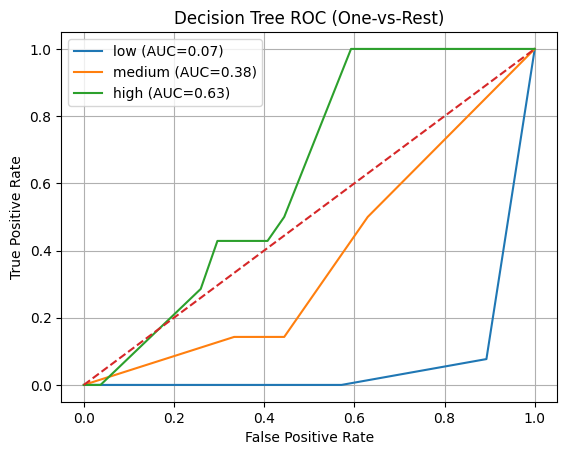

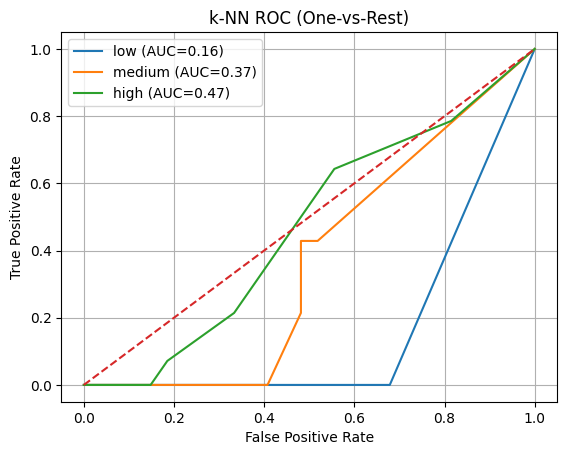

In [6]:
# Cell 6: evaluate classifiers
y_pred_dt = best_dt.predict(X_test)
y_pred_knn = knn_pipeline.predict(X_test)

print("Decision Tree classification report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt), "F1-macro:", f1_score(y_test, y_pred_dt, average='macro'))

print("\nK-NN classification report:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn), "F1-macro:", f1_score(y_test, y_pred_knn, average='macro'))

# Confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=['low','medium','high'])
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=['low','medium','high'])
print("\nDecision Tree Confusion Matrix:\n", cm_dt)
print("\nK-NN Confusion Matrix:\n", cm_knn)

# ROC curves (one-vs-rest)
from sklearn.preprocessing import label_binarize
classes = ['low','medium','high']
y_test_bin = label_binarize(y_test, classes=classes)

y_score_dt = best_dt.predict_proba(X_test)
y_score_knn = knn_pipeline.predict_proba(X_test)

# Decision Tree ROC plot (one plot, multiple curves)
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_score_dt[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cls} (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

# k-NN ROC plot
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_score_knn[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cls} (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-NN ROC (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


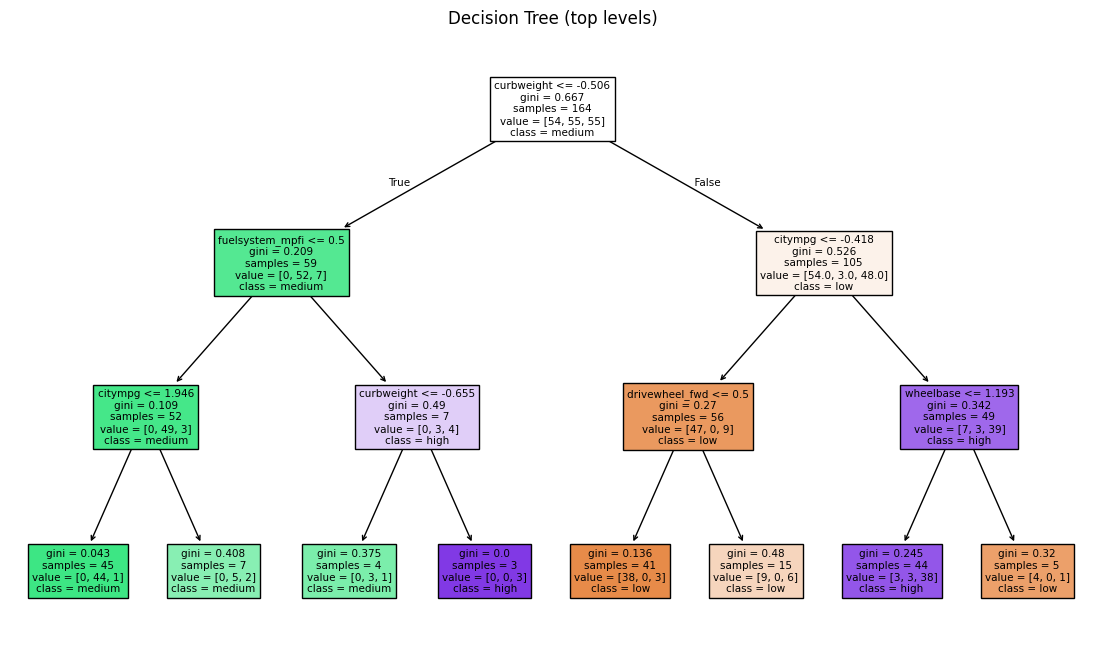

In [8]:
# Cell 7: visualize decision tree (small trees only)
# pull the tree from pipeline
tree = best_dt.named_steps['clf']
# extract feature names after preprocessing
ohe = best_dt.named_steps['pre'].named_transformers_['cat'].named_steps['onehot']
cat_feat_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols + cat_feat_names

plt.figure(figsize=(14,8))
plot_tree(tree, feature_names=feature_names, class_names=classes, filled=True, max_depth=3)
plt.title('Decision Tree (top levels)')
plt.show()


Silhouette by k: {2: np.float64(0.31271412417177796), 3: np.float64(0.21815125344959604), 4: np.float64(0.23826092793567694), 5: np.float64(0.24405194927665375), 6: np.float64(0.24062261980659078)}
Best k by silhouette: 2


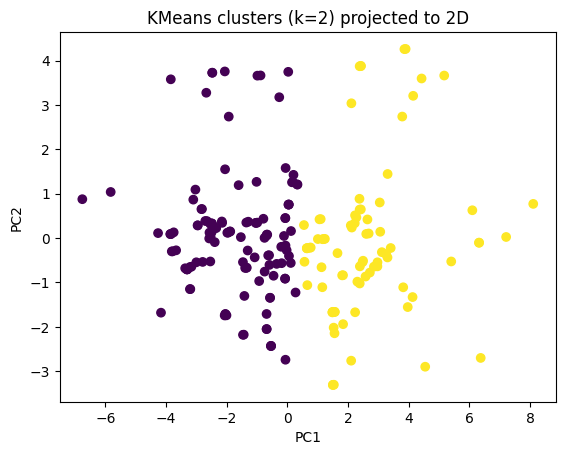

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
cluster,,,,,,,,,,,,,
0,95.819355,166.980645,64.662903,53.291129,2212.967742,102.943548,3.189597,3.221210,10.090403,81.137097,5176.209677,28.758065,34.572581
1,103.253086,184.870370,67.813580,54.388889,3080.037037,163.592593,3.544321,3.307778,10.222346,139.296296,5046.913580,19.802469,24.901235


,count
cluster,
0,124
1,81


In [9]:
# Cell 8: KMeans clustering on numeric features
num_data = df_small[num_cols].copy()
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_data)

# silhouette to choose k between 2 and 6
sil_scores = {}
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(num_scaled)
    sil_scores[k] = silhouette_score(num_scaled, labels)
print("Silhouette by k:", sil_scores)
best_k = max(sil_scores, key=sil_scores.get)
print("Best k by silhouette:", best_k)

# Fit best KMeans
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(num_scaled)
labels_best = kmeans_best.labels_

# 2D visualization via PCA
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(num_scaled)
plt.figure()
plt.scatter(coords[:,0], coords[:,1], c=labels_best)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'KMeans clusters (k={best_k}) projected to 2D')
plt.show()

# cluster summaries
cluster_df = num_data.copy()
cluster_df['cluster'] = labels_best
display(cluster_df.groupby('cluster').mean())
display(cluster_df['cluster'].value_counts())


In [10]:
# Cell 9: association rules on categorical features
if not MLXTEND_AVAILABLE:
    print("mlxtend not available. To run Apriori install: pip install mlxtend")
else:
    cat_for_rules = df_small[cat_cols].astype(str)
    onehot = pd.get_dummies(cat_for_rules)
    print("Shape of one-hot matrix:", onehot.shape)

    # run apriori with reasonable support threshold (adjust as needed)
    freq_items = apriori(onehot, min_support=0.06, use_colnames=True)
    freq_items_sorted = freq_items.sort_values('support', ascending=False).head(30)
    display(freq_items_sorted)

    rules = association_rules(freq_items, metric="lift", min_threshold=1.2)
    # show top rules sorted by lift (and reasonable confidence)
    top_rules = rules.sort_values(['lift','confidence'], ascending=[False, False]).head(20)
    display(top_rules[['antecedents','consequents','support','confidence','lift']])


Shape of one-hot matrix: (205, 40)


,support,itemsets
9,0.985366,(enginelocation_front)
4,0.902439,(fueltype_gas)
64,0.887805,"(enginelocation_front, fueltype_gas)"
5,0.819512,(aspiration_std)
80,0.804878,"(enginelocation_front, aspiration_std)"
60,0.785366,"(aspiration_std, fueltype_gas)"
268,0.770732,"(enginelocation_front, aspiration_std, fueltyp..."
120,0.721951,"(enginetype_ohc, enginelocation_front)"
12,0.721951,(enginetype_ohc)
303,0.648780,"(enginetype_ohc, enginelocation_front, fueltyp..."


,antecedents,consequents,support,confidence,lift
1119,"(carbody_sedan, fueltype_diesel)","(doornumber_four, fuelsystem_idi)",0.063415,0.866667,10.45098
1120,"(carbody_sedan, fuelsystem_idi)","(doornumber_four, fueltype_diesel)",0.063415,0.866667,10.45098
4093,"(carbody_sedan, enginelocation_front, fueltype...","(doornumber_four, fuelsystem_idi)",0.063415,0.866667,10.45098
4094,"(carbody_sedan, enginelocation_front, fuelsyst...","(doornumber_four, fueltype_diesel)",0.063415,0.866667,10.45098
4107,"(carbody_sedan, fueltype_diesel)","(doornumber_four, enginelocation_front, fuelsy...",0.063415,0.866667,10.45098
4108,"(carbody_sedan, fuelsystem_idi)","(doornumber_four, enginelocation_front, fuelty...",0.063415,0.866667,10.45098
1121,"(doornumber_four, fueltype_diesel)","(carbody_sedan, fuelsystem_idi)",0.063415,0.764706,10.45098
1122,"(doornumber_four, fuelsystem_idi)","(carbody_sedan, fueltype_diesel)",0.063415,0.764706,10.45098
4091,"(doornumber_four, enginelocation_front, fuelty...","(carbody_sedan, fuelsystem_idi)",0.063415,0.764706,10.45098
4092,"(doornumber_four, enginelocation_front, fuelsy...","(carbody_sedan, fueltype_diesel)",0.063415,0.764706,10.45098


In [11]:
# Cell 10: sample notes to copy into the README or final report
print("Recommended next steps for deliverable submission:")
print("1. Review classification metrics and choose the best model to present (Decision Tree had hyperparameter tuning).")
print("2. Include confusion matrices and ROC plots in the notebook as figures.")
print("3. For clustering, include the silhouette table and PCA scatter with cluster labels.")
print("4. For pattern mining, include the top association rules and explain two business use-cases for them.")


Recommended next steps for deliverable submission:
1. Review classification metrics and choose the best model to present (Decision Tree had hyperparameter tuning).
2. Include confusion matrices and ROC plots in the notebook as figures.
3. For clustering, include the silhouette table and PCA scatter with cluster labels.
4. For pattern mining, include the top association rules and explain two business use-cases for them.
